In [1]:
def binary_search(elements, element):
    size = len(elements)
    
    if element < elements[0] or element > elements[-1]:
        return -1
    
    if size < 2 and element in elements:
        return elements.index(element)
        
    first_half = elements[0:size//2]
    second_half = elements[size//2:size]
    
    if element <= first_half[-1]:
        return binary_search(first_half, element)
    else:
        return (size//2) + binary_search(second_half, element)

In [2]:
def ternary_search(elements, element):
    size = len(elements)
    
    if element < elements[0] or element > elements[-1]:
        return -1
    
    if size < 3 and element in elements:
        return elements.index(element)
    
    first_third = elements[0:size//3]
    second_third = elements[size//3:(size//3)*2]
    third_third = elements[(size//3)*2:size]
    
    if element <= first_third[-1]:
        return ternary_search(first_third, element)
    elif element <= second_third[-1]:
        return (size//3) + ternary_search(second_third, element)
    else:
        return (size//3) * 2 + ternary_search(third_third, element)

In [3]:
import random
import timeit
import matplotlib.pyplot as plotter

In [4]:
start = 10
end = 10000
iterations = 100 
st = 100

binary_time_list = list()
ternary_time_list = list()

for n in range(start, end, st):
    binary_execution_time_acumulator = 0
    ternary_execution_time_acummulator = 0

    for i in range(1, iterations):
        random_list_size = random.randint(1, end)
        random_list = list(range(1, random_list_size))
        random_element = random.randint(1, random_list_size)
        binary_execution_time_acumulator += timeit.timeit(lambda: binary_search(random_list, random_element), number = 1)
        ternary_execution_time_acummulator += timeit.timeit(lambda: ternary_search(random_list, random_element), number = 1)

    binary_search_average = binary_execution_time_acumulator / iterations
    ternary_search_average = ternary_execution_time_acummulator / iterations

    binary_time_list.append(binary_search_average)
    ternary_time_list.append(ternary_search_average)

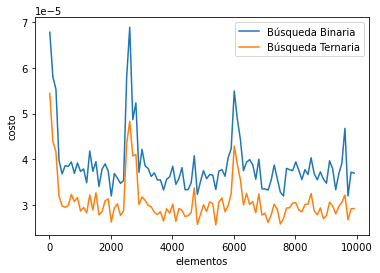

In [5]:
axisX = list(range(start, end, st))
plotter.xlabel('elementos')
plotter.ylabel('costo')

plotter.plot(axisX, binary_time_list, label = 'Búsqueda Binaria')
plotter.plot(axisX, ternary_time_list, label = 'Búsqueda Ternaria')

plotter.legend()